In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,recall_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV


In [ ]:
#Read dataset

data = pd.read_csv("churn.csv", index_col=0)
data = data.reset_index(drop=True)
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Drop CustomerId, Surname features because they are just identifiers

data.drop(["CustomerId", "Surname"], axis=1, inplace=True)

In [ ]:
#Shape of dataset

data.shape

(10000, 11)

In [ ]:
#Information about each feature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
#Separate numeric and categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Geography', 'Gender']

In [ ]:
numeric_cols = data.select_dtypes(exclude=['object']).columns.tolist()
numeric_cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [ ]:
#Check out target column values
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target Distribution')

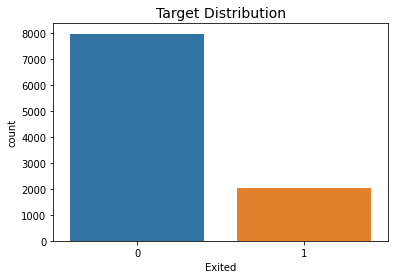

In [ ]:
sns.countplot(data["Exited"])
plt.title("Target Distribution", fontsize=14)

It looks like we have less observations of 1 (Exited) class label

In [ ]:
#Check for missing values
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no missing values in our data.

In [ ]:
#Divide data into X(features) and Y(target)

Y = data["Exited"]
X = data.drop("Exited", axis=1)

In [ ]:
X.shape, Y.shape

((10000, 10), (10000,))

In [ ]:
# Splitting data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

**Standardisation on Numeric Features using Standard Scaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#Fit and tranform train data
X_train[numeric_cols[:-1]] = sc.fit_transform(X_train[numeric_cols[:-1]])
#Tranform test data as well
X_test[numeric_cols[:-1]] = sc.transform (X_test[numeric_cols[:-1]])

**Handling Categorical Columns**

In [ ]:
#Checking unique values in each categorical column

for i in categorical_cols:
  print("Column:", i)
  print(X_train[i].value_counts())
  print("\n")

Column: Geography
France     3994
Germany    2011
Spain      1995
Name: Geography, dtype: int64


Column: Gender
Male      4362
Female    3638
Name: Gender, dtype: int64




In [ ]:
# One Hot Encoding on the Categorical Columns

X_train = pd.get_dummies(X_train, columns =categorical_cols, drop_first = False)
X_test = pd.get_dummies(X_test, columns =categorical_cols, drop_first = False)

In [ ]:
X_train.shape, X_test.shape

((8000, 13), (2000, 13))

In [ ]:
results={}

### Baseline Model: Predicting all instances as majority

In [ ]:
#As we saw before too, 0 ('did not exit') is the majority class. Lets begin by predicting everything as 0.
preds_test = np.zeros(len(X_test))

#metrics on test data 
accuracy = accuracy_score(y_test, preds_test)
precision = precision_score(y_test, preds_test)
recall = recall_score(y_test, preds_test)
f1 = f1_score(y_test, preds_test)

print(f"Accuracy is: %.2f" % (accuracy*100) , "%")
print(f'Precision score is: {precision}')
print(f'Recall score is: {recall}')
print(f'F1 score is: {f1}\n')

Accuracy is: 80.35 %
Precision score is: 0.0
Recall score is: 0.0
F1 score is: 0.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**We see that the accuracy is reasonable high even for this baseline model. This is because we have an imbalanced dataset.**

In [ ]:
print("Confusion Matrix is:")
print(confusion_matrix(y_test, preds_test))

Confusion Matrix is:
[[1607    0]
 [ 393    0]]


In [ ]:
print("AUC on Test data is " +str(roc_auc_score(y_test,preds_test)))

AUC on Test data is 0.5


In [ ]:
results['baseline']= {'precision':0.0, 'recall':0.0, 'f1':0.0}

### Model 1: Logistic Regression

In [ ]:
#Train Logistic Regression Model with DEFAULT PARAMETERS
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

#Evaluation on Test Data
preds_test = model.predict(X_test) 

#metrics on test data 
accuracy = accuracy_score(y_test, preds_test)
precision = precision_score(y_test, preds_test)
recall = recall_score(y_test, preds_test)
f1 = f1_score(y_test, preds_test)

print(f"Accuracy is: %.2f" % (accuracy*100) , "%")
print(f'Precision score is: {precision}')
print(f'Recall score is: {recall}')
print(f'F1 score is: {f1}\n')

Accuracy is: 81.10 %
Precision score is: 0.5524475524475524
Recall score is: 0.2010178117048346
F1 score is: 0.2947761194029851



**Tuning Hyper-parameters for Logistic Regression using K-fold Cross Validation**

In [ ]:
#Tune Hyper-parameter C 

grid_param = {
    'C': [0.001,0.01,0.1,1,10,100]
}

model = LogisticRegression(random_state=42)

gd_sr = GridSearchCV(estimator=model,
                     param_grid=grid_param,
                     scoring='f1',
                     cv=5, #5-fold cross validation
                     n_jobs=-1)

gd_sr.fit(X_train, y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'C': 10}


In [ ]:
#Train Final Logistic Regression Model with best hyper-parameters

lr_model = LogisticRegression(C=10, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(C=10, random_state=42)

In [ ]:
#Evaluation on Test Data

preds_test = lr_model.predict(X_test) 

#metrics on test data 
accuracy = accuracy_score(y_test, preds_test)
precision = precision_score(y_test, preds_test)
recall = recall_score(y_test, preds_test)
f1 = f1_score(y_test, preds_test)

print(f"Accuracy is: %.2f" % (accuracy*100) , "%")
print(f'Precision score is: {precision}')
print(f'Recall score is: {recall}')
print(f'F1 score is: {f1}\n')

Accuracy is: 81.10 %
Precision score is: 0.5524475524475524
Recall score is: 0.2010178117048346
F1 score is: 0.2947761194029851



In [ ]:
print("Confusion Matrix is:")
print(confusion_matrix(y_test, preds_test))

Confusion Matrix is:
[[1543   64]
 [ 314   79]]


In [ ]:
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,1543,64,1607
1,314,79,393
All,1857,143,2000


In [ ]:
print("AUC on Test data is " +str(roc_auc_score(y_test,preds_test)))

AUC on Test data is 0.5805960247074267


**We find that our metrics have improved. Especially Precision and Recall which were 0 for Baseline Model.**

In [ ]:
results['logistic regression']= {'precision':0.5524, 'recall':0.2010, 'f1':0.2947}

### Model 2: K-Nearest Neighbor Model

In [ ]:
#Train KNN with DEFAULT PARAMETERS

model =KNeighborsClassifier()  
model.fit(X_train, y_train)

#Evaluation on Test Data
preds_test = model.predict(X_test) 

#metrics on test data 
accuracy = accuracy_score(y_test, preds_test)
precision = precision_score(y_test, preds_test)
recall = recall_score(y_test, preds_test)
f1 = f1_score(y_test, preds_test)

print(f"Accuracy is: %.2f" % (accuracy*100) , "%")
print(f'Precision score is: {precision}')
print(f'Recall score is: {recall}')
print(f'F1 score is: {f1}\n')

Accuracy is: 83.65 %
Precision score is: 0.632
Recall score is: 0.4020356234096692
F1 score is: 0.49144634525660963



In [ ]:
#Tune Hyper-parameter 'K'

grid_param = {
    'n_neighbors': list(range(1,31)), 
    'weights': ['uniform', 'distance'],

}


model=KNeighborsClassifier() 

gd_sr = RandomizedSearchCV(estimator=model,
                     param_distributions=grid_param,
                     scoring='f1',
                     cv=5, #5-fold cross validation
                     n_jobs=-1)

gd_sr.fit(X_train, y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'weights': 'uniform', 'n_neighbors': 3}


In [ ]:
#Train Final KNN Model with best hyper-parameters

knn_model =KNeighborsClassifier(**best_parameters)  

knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Evaluation on Test Data

preds_test = knn_model.predict(X_test) 

#metrics on test data 
accuracy = accuracy_score(y_test, preds_test)
precision = precision_score(y_test, preds_test)
recall = recall_score(y_test, preds_test)
f1 = f1_score(y_test, preds_test)

print(f"Accuracy is: %.2f" % (accuracy*100) , "%")
print(f'Precision score is: {precision}')
print(f'Recall score is: {recall}')
print(f'F1 score is: {f1}\n')

Accuracy is: 83.50 %
Precision score is: 0.6067796610169491
Recall score is: 0.455470737913486
F1 score is: 0.5203488372093024



In [ ]:
print("Confusion Matrix is:")
print(confusion_matrix(y_test, preds_test))

Confusion Matrix is:
[[1491  116]
 [ 214  179]]


In [ ]:
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,1491,116,1607
1,214,179,393
All,1705,295,2000


In [ ]:
print("AUC on Test data is " +str(roc_auc_score(y_test,preds_test)))

AUC on Test data is 0.6916432718814474


**We see that all the metrics have seen a considerable improvement with the tuned KNN Model.**

In [ ]:
results['KNN']= {'precision':0.6067, 'recall':0.4554, 'f1':0.5203}

### Model 3: Decision Tree

In [ ]:
#Train Decision Tree Model with DEFAULT PARAMETERS

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

#Evaluation on Test Data
preds_test = model.predict(X_test) 

#metrics on test data 
accuracy = accuracy_score(y_test, preds_test)
precision = precision_score(y_test, preds_test)
recall = recall_score(y_test, preds_test)
f1 = f1_score(y_test, preds_test)

print(f"Accuracy is: %.2f" % (accuracy*100) , "%")
print(f'Precision score is: {precision}')
print(f'Recall score is: {recall}')
print(f'F1 score is: {f1}\n')

Accuracy is: 78.05 %
Precision score is: 0.44819819819819817
Recall score is: 0.5063613231552163
F1 score is: 0.4755077658303465



**Tuning Hyper-parameters for Decision Tree using K-fold Cross Validation**

In [ ]:
#Tune Hyper-parameters

grid_param = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}


model = DecisionTreeClassifier(random_state = 42)

gd_sr = GridSearchCV(estimator=model,
                     param_grid=grid_param,
                     scoring='f1',
                     cv=5, #5-fold cross validation
                     n_jobs=-1)

gd_sr.fit(X_train, y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'class_weight': {0: 1, 1: 2}, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 0.4, 'max_leaf_nodes': 32, 'min_samples_split': 40}


In [ ]:
#Train Final Decision Tree Model with best hyper-parameters

optimal_params = {'class_weight': {0: 1, 1: 2}, 
 'criterion': 'entropy', 
 'max_depth': 8, 
 'max_features': 0.4, 
 'max_leaf_nodes': 32, 
 'min_samples_split': 40}

dt_model = DecisionTreeClassifier(random_state = 42, **optimal_params)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 2}, criterion='entropy',
                       max_depth=8, max_features=0.4, max_leaf_nodes=32,
                       min_samples_split=40, random_state=42)

In [ ]:
#Evaluation on Test Data

preds_test = dt_model.predict(X_test) 

#metrics on test data 
accuracy = accuracy_score(y_test, preds_test)
precision = precision_score(y_test, preds_test)
recall = recall_score(y_test, preds_test)
f1 = f1_score(y_test, preds_test)

print(f"Accuracy is: %.2f" % (accuracy*100) , "%")
print(f'Precision score is: {precision}')
print(f'Recall score is: {recall}')
print(f'F1 score is: {f1}\n')

Accuracy is: 83.95 %
Precision score is: 0.5829493087557603
Recall score is: 0.6437659033078881
F1 score is: 0.6118500604594922



In [ ]:
print("Confusion Matrix is:")
print(confusion_matrix(y_test, preds_test))

Confusion Matrix is:
[[1426  181]
 [ 140  253]]


In [ ]:
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,1426,181,1607
1,140,253,393
All,1566,434,2000


In [ ]:
print("AUC on Test data is " +str(roc_auc_score(y_test,preds_test)))

AUC on Test data is 0.7655668346657674


In [ ]:
results['Decision Tree']= {'precision':0.5829, 'recall':0.6437, 'f1':0.6118}

**We see that all the metrics have seen a considerable improvement with the tuned decision tree.**

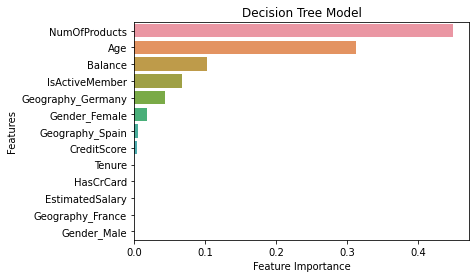

In [ ]:
#Visualizing Feature Importance
feature_imp = pd.Series(dt_model.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title("Decision Tree Model")
plt.show()

### Model 4: SVM Classifier

In [ ]:
#Train SVC Model with DEFAULT PARAMETERS
model = SVC(random_state=42)
model.fit(X_train, y_train)

#Evaluation on Test Data
preds_test = model.predict(X_test) 

#metrics on test data 
accuracy = accuracy_score(y_test, preds_test)
precision = precision_score(y_test, preds_test)
recall = recall_score(y_test, preds_test)
f1 = f1_score(y_test, preds_test)

print(f"Accuracy is: %.2f" % (accuracy*100) , "%")
print(f'Precision score is: {precision}')
print(f'Recall score is: {recall}')
print(f'F1 score is: {f1}\n')

Accuracy is: 85.75 %
Precision score is: 0.7934782608695652
Recall score is: 0.37150127226463103
F1 score is: 0.5060658578856153



**Tuning Hyper-parameters for SVM using K-fold Cross Validation**

In [ ]:
#Tune Hyper-parameters

grid_param = {
    'C': [0.1,1, 10, 100], 
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

model = SVC(random_state=42)

gd_sr = RandomizedSearchCV(estimator=model,
                     param_distributions=grid_param,
                     scoring='f1',
                     cv=5, #5-fold cross validation
                     n_jobs=-1)

gd_sr.fit(X_train, y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'kernel': 'poly', 'gamma': 1, 'C': 1}


In [ ]:
#Train Final SVC Model with best hyper-parameters

svc_model = SVC(random_state=42,kernel ='poly', gamma= 1, C= 1)
svc_model.fit(X_train, y_train)

SVC(C=1, gamma=1, kernel='poly', random_state=42)

In [ ]:
#Evaluation on Test Data

preds_test = svc_model.predict(X_test) 

#metrics on test data 
accuracy = accuracy_score(y_test, preds_test)
precision = precision_score(y_test, preds_test)
recall = recall_score(y_test, preds_test)
f1 = f1_score(y_test, preds_test)

print(f"Accuracy is: %.2f" % (accuracy*100) , "%")
print(f'Precision score is: {precision}')
print(f'Recall score is: {recall}')
print(f'F1 score is: {f1}\n')

Accuracy is: 86.60 %
Precision score is: 0.7593360995850622
Recall score is: 0.46564885496183206
F1 score is: 0.5772870662460569



In [ ]:
print("Confusion Matrix is:")
print(confusion_matrix(y_test, preds_test))

Confusion Matrix is:
[[1549   58]
 [ 210  183]]


In [ ]:
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,1549,58,1607
1,210,183,393
All,1759,241,2000


In [ ]:
print("AUC on Test data is " +str(roc_auc_score(y_test,preds_test)))

AUC on Test data is 0.7147783789432682


In [ ]:
results['SVM']= {'precision':0.7593, 'recall':0.4656, 'f1':0.5772}

**We observe a high amount of increase in Precision but Recall is slightly lower as compared to the hyper-parameter tuned decision tree.**

## Summary of Results

In [ ]:
results_df = pd.DataFrame(results).T
results_df

,precision,recall,f1
baseline,0.0000,0.0000,0.0000
logistic regression,0.5524,0.2010,0.2947
KNN,0.6067,0.4554,0.5203
Decision Tree,0.5829,0.6437,0.6118
SVM,0.7593,0.4656,0.5772


## Conclusion:

We believe minimizing False Negatives is more important for this
task so that the bank does not wrongly miss out on any possible customer churn and is then able to provide some schemes/offers to the customermiss so that they don’t leave the services of the bank.

Therefore, we can consider the best performing model as the hyper-parameter tuned Decision Tree classifier because it gives very high Recall (False Negatives are less ) and sufficiently high Precision (False Positives are low ) and the highest F1-score of 0.61. The future work for this project would be to experiment with more models or to come up with more feature engineering techniques so as to further improve the performance.